# Enhanced protein isoform characterization through long-read proteogenomics 
## Supplementary Figure 2b 
---
Ben Jordan

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import os
import seaborn as sns


import matplotlib
import os, sys

import config

matplotlib.rc('font', **config.font)

# all plots go into a directory
if not os.path.exists('plot'):
    os.makedirs('plot')

# all statistics go into a directory
if not os.path.exists('stats'):
    os.makedirs('stats')

cpat_orf_file = f'{config.PIPELINE_RESULTS_DIRECTORY}/cpat/jurkat.ORF_prob.tsv'

cpat_all_orfs = pd.read_table(cpat_orf_file)
cpat_all_orfs['pb_acc'] = cpat_all_orfs['ID'].str.split('_').str[0]

### Supplementary Fig. 2: Generation and characterization of candidate protein isoform sequences from long-read RNA-seq data. 

 b, Count of transcript isoforms with more than one high scoring ORF (defined as CPAT score above 0.9). 

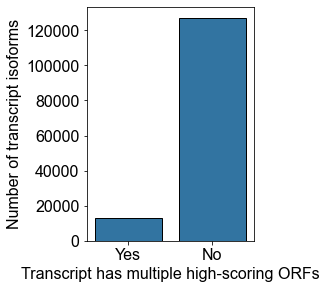

<Figure size 432x288 with 0 Axes>

In [4]:
# compute number of cases of multiple orf candidates (2+ orfs with cpat score above 0.9)

def plot_multiple_ambiguous_orfs(cpat_all_orfs, upper_threshold):
    def determine_if_multiple_ambiguous_orfs_for_pb(group, upper_threshold):
        # defined as one orf being higher than upper_threshold coding score
        high_scoring = group[group['Coding_prob'] > upper_threshold]
        return (len(high_scoring) > 1)

    cpat_ambiguous_orfs = (
        cpat_all_orfs
            .groupby('pb_acc')
            .apply(lambda group:determine_if_multiple_ambiguous_orfs_for_pb(group, upper_threshold) )
            .reset_index()
            )
    cpat_ambiguous_orfs.columns = ['pb_acc', 'is_ambiguous_orf']
    cpat_ambiguous_sizes = cpat_ambiguous_orfs.groupby('is_ambiguous_orf').size().reset_index()
    cpat_ambiguous_sizes.columns = ['is_ambiguous_orf', 'ambiguous_orf_sizes']
    cpat_ambiguous_sizes['percent'] = cpat_ambiguous_sizes['ambiguous_orf_sizes'] / cpat_ambiguous_sizes['ambiguous_orf_sizes'].sum() * 100
    cpat_ambiguous_sizes.columns = ['has_multi_candidate_orfs','count', 'percent']
    cpat_ambiguous_sizes['has_multi_candidate_orfs'] = cpat_ambiguous_sizes['has_multi_candidate_orfs'].replace({True:'Yes',False:'No'})

    # plot the number of cases of multiple orf candidates 
    fig, ax = plt.subplots(figsize=(3, 4.3))
    sns.barplot(data=cpat_ambiguous_sizes,x='has_multi_candidate_orfs',y='count',order=['Yes','No'], color='C0', edgecolor='black', ax=ax)
    plt.xlabel('Transcript has multiple high-scoring ORFs')
    plt.ylabel('Number of transcript isoforms')
    plt.savefig('plot/SuppFig2b_bar_has_multi_candidate_orfs.pdf', bbox_inches='tight')
    plt.show()
    plt.clf()

    # output table for cases of multi orf canidates
    cpat_ambiguous_sizes.to_csv('stats/SuppFig2b_src_data_multiple_candidate_orfs.tsv', sep='\t', index=False)
plot_multiple_ambiguous_orfs(cpat_all_orfs, 0.9)